## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import copy
from collections import Counter

### load data

In [5]:
genotypes = pd.read_csv('../data/20200727_all_wscomposite_binsize1mb_3mbxo_3mbfill.csv', index_col=0, header=[0,1])

#### subset chr 4

In [6]:
chr4_gt = genotypes[[i[0] for i in genotypes.columns if i[0].startswith('4-')]]
chr4_gt.index = [str(int(i)) for i in chr4_gt.index]

#### subset F2

In [8]:
F2s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('02')]]

#### plot chr4 across F2s

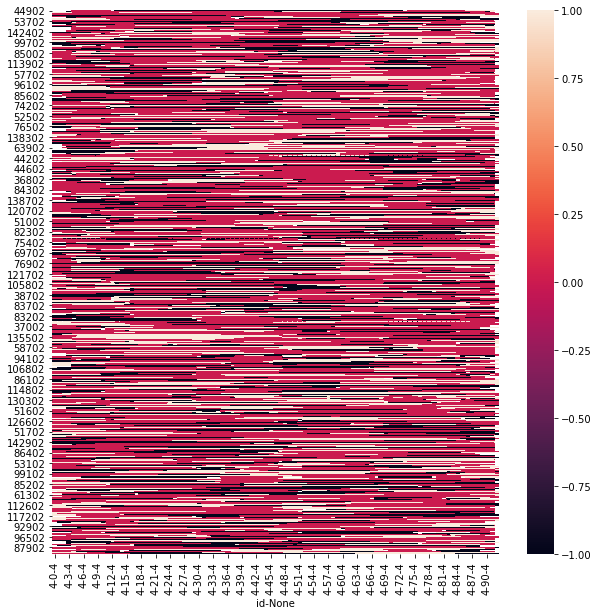

In [133]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.heatmap(F2s, ax=ax)

plt.show()

In [14]:
dataframe = F2s
column_counters = {}
for c in dataframe.columns:
    cc = Counter(dataframe[c])
    column_counters[c[0]] = {0:cc[0.0]/930,
                          1:cc[1.0]/930,
                          -1:cc[-1.0]/930}

In [13]:
F2s.mean(axis=0)

id     
4-0   4    0.028409
4-1   4    0.018484
4-2   4    0.016750
4-3   4   -0.005764
4-4   4    0.005305
             ...   
4-88  4    0.032218
4-89  4    0.029326
4-90  4    0.020734
4-91  4    0.024138
4-92  4    0.117347
Length: 93, dtype: float64

In [16]:
len(F2s)
len(F8s)

292

In [19]:
counts = pd.DataFrame(column_counters).T

In [20]:
F8s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('08')]]

In [21]:
dataframe = F8s
column_counters = {}
for c in dataframe.columns:
    cc = Counter(dataframe[c])
    column_counters[c[0]] = {0:cc[0.0]/292,
                          1:cc[1.0]/292,
                          -1:cc[-1.0]/292}
counts_F8 = pd.DataFrame(column_counters).T

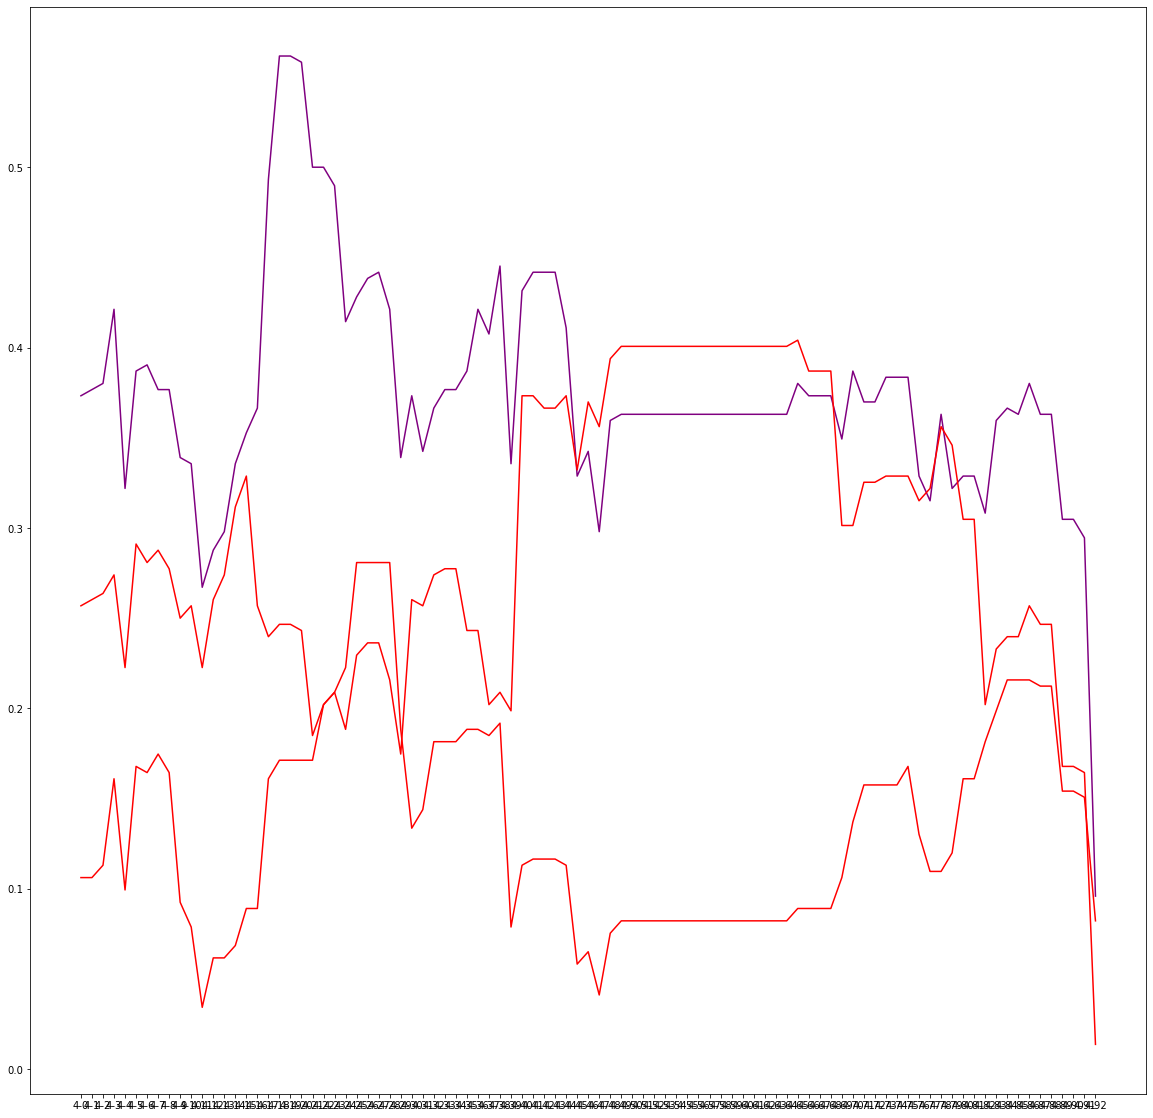

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))

ax.plot(counts[0], color='purple')
ax.plot(counts[1], color='red')
ax.plot(counts[-1], color='red')


#ax.plot(counts_F8[0], color='Green')
#ax.plot(counts_F8[1], color='Yellow')
#ax.plot(counts_F8[-1], color='Blue')
plt.show()

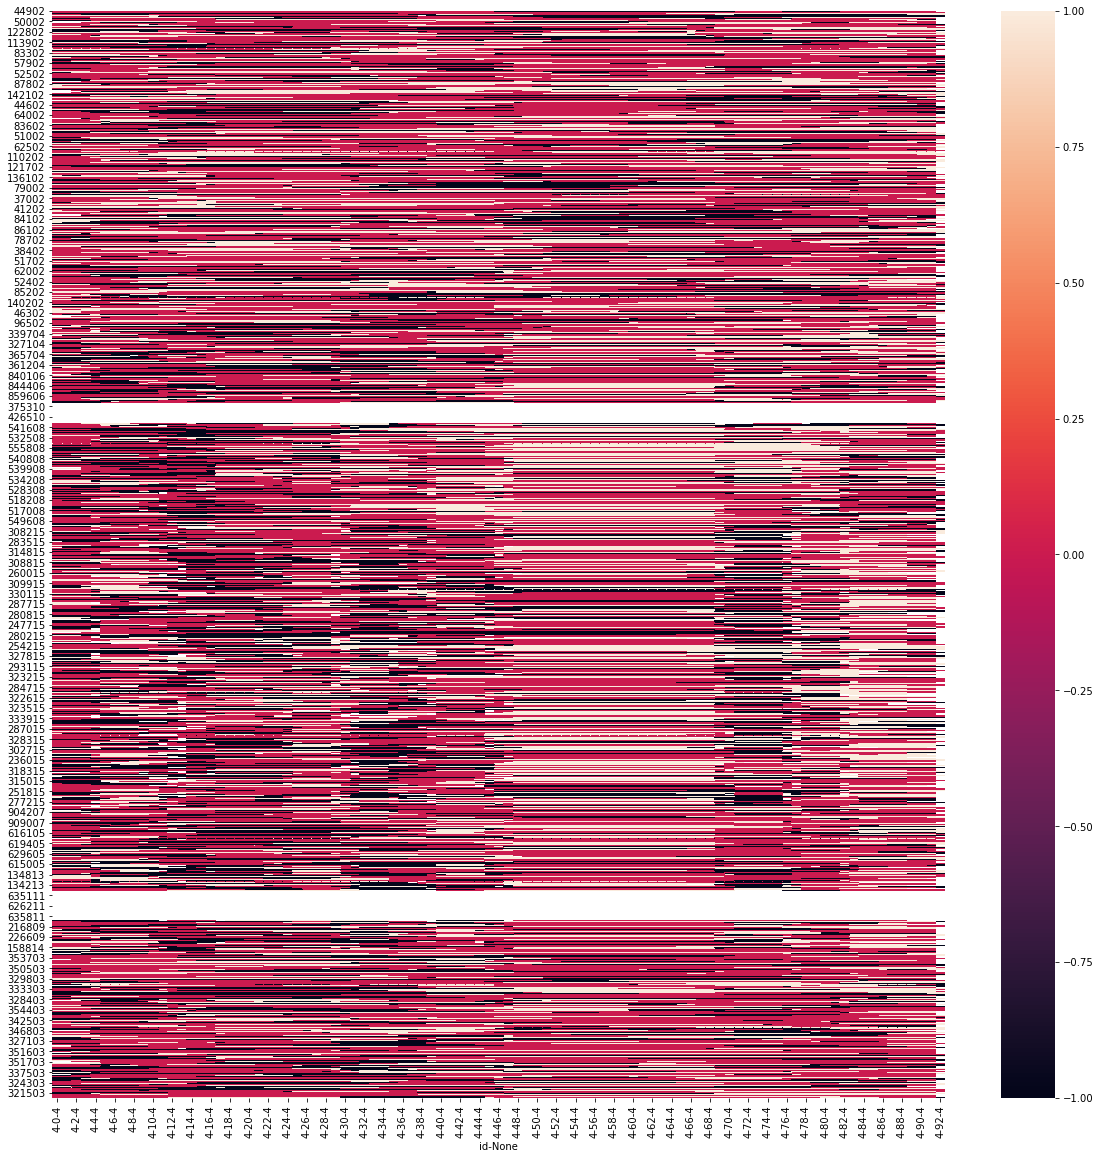

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))

sns.heatmap(chr4_gt, ax=ax, vmin=-1, vmax=1)

In [423]:
def getMissDist(x,y):
    return np.nanmean( (x - y)**2 )

def getMissDistMat(dat):
    Npat = dat.shape[0]
    dist = np.ndarray(shape=(Npat,Npat))
    dist.fill(0)
    for ix in range(0,Npat):
        x = dat[ix,]
        if ix >0:
            for iy in range(0,ix):
                y = dat[iy,]
                dist[ix,iy] = getMissDist(x,y)
                dist[iy,ix] = dist[ix,iy]
    return dist

In [ ]:
for i,k in chr4_gt.iterrows():
    for j, l in chr4_gt.iterrows():
        

In [426]:
a = getMissDistMat(np.array(chr4_gt))

/home/tilman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [428]:
import scipy as scp

In [448]:
from sklearn.impute import SimpleImputer

In [454]:
chr4_gt.columns = chr4_gt.columns.droplevel(1)

In [458]:
SI = SimpleImputer(missing_values=np.nan, strategy='mean')

In [468]:
SI.fit(chr4_gt)

SimpleImputer()

In [469]:
imputed_chr4 = SI.transform(chr4_gt)

In [466]:
chr4_gt.index = chr4_gt.index.astype(str)

In [474]:
imputedchr4df = pd.DataFrame(imputed_chr4)

In [475]:
imputedchr4df.columns = chr4_gt.columns
imputedchr4df.index = chr4_gt.index

/home/tilman/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


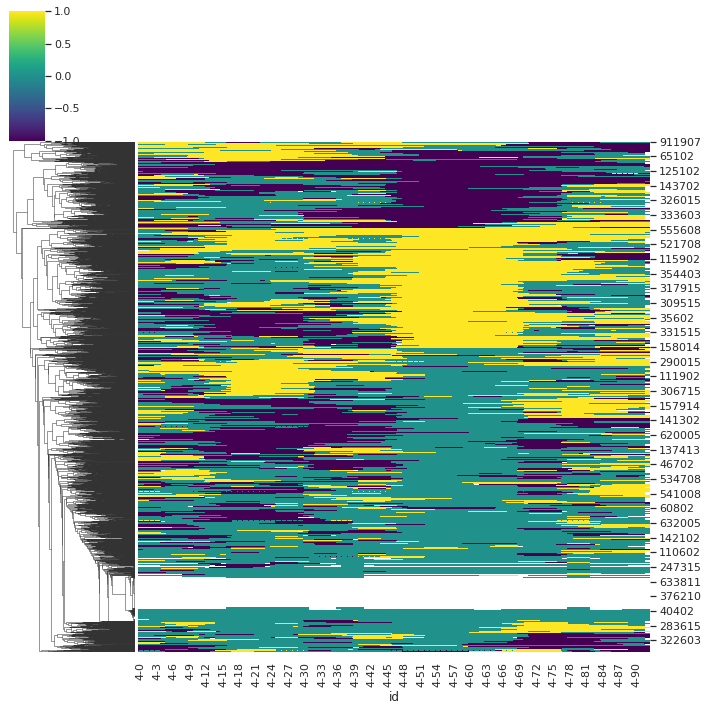

In [498]:
sns.clustermap(imputedchr4df, col_cluster=False, mask=mask, cmap='viridis')

In [501]:
imputedchr4dff3 = imputedchr4df.loc[[i for i in list(imputedchr4df.index) if i.endswith('03')]]

In [505]:
imputedchr4dff2 = imputedchr4df.loc[[i for i in list(imputedchr4df.index) if i.endswith('02')]]

In [514]:
imputedchr4dff8 = imputedchr4df.loc[[i for i in list(imputedchr4df.index) if i.endswith('08')]]

In [509]:
peak_clusterf3 = scp.cluster.hierarchy.linkage(imputedchr4dff3[['4-31','4-32', '4-33', '4-34']])

In [510]:
peak_clusterf2 = scp.cluster.hierarchy.linkage(imputedchr4dff2[['4-31','4-32', '4-33', '4-34']])

In [515]:
peak_clusterf8 = scp.cluster.hierarchy.linkage(imputedchr4dff8[['4-31','4-32', '4-33', '4-34']])

/home/tilman/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


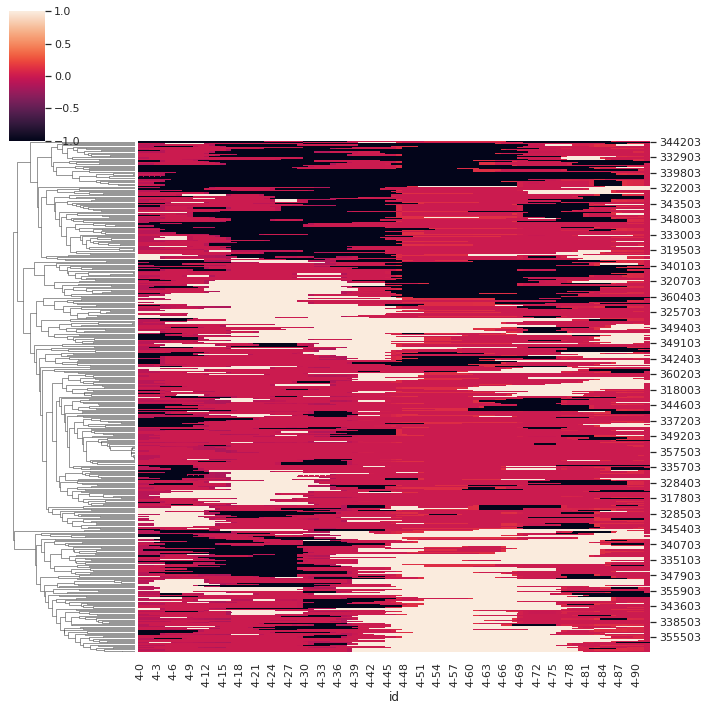

In [517]:
sns.clustermap(imputedchr4dff3, col_cluster=False)

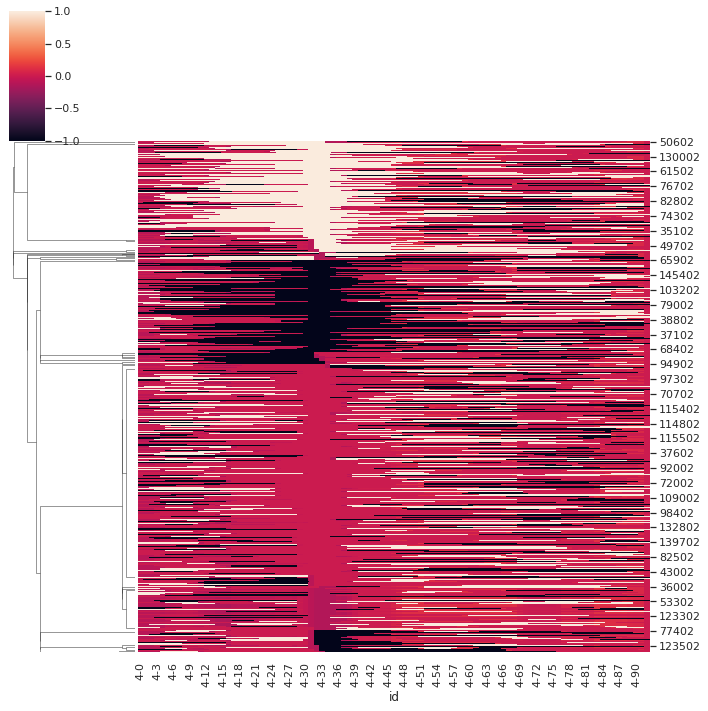

In [513]:
sns.clustermap(imputedchr4dff2, col_cluster=False, row_linkage=peak_clusterf2)

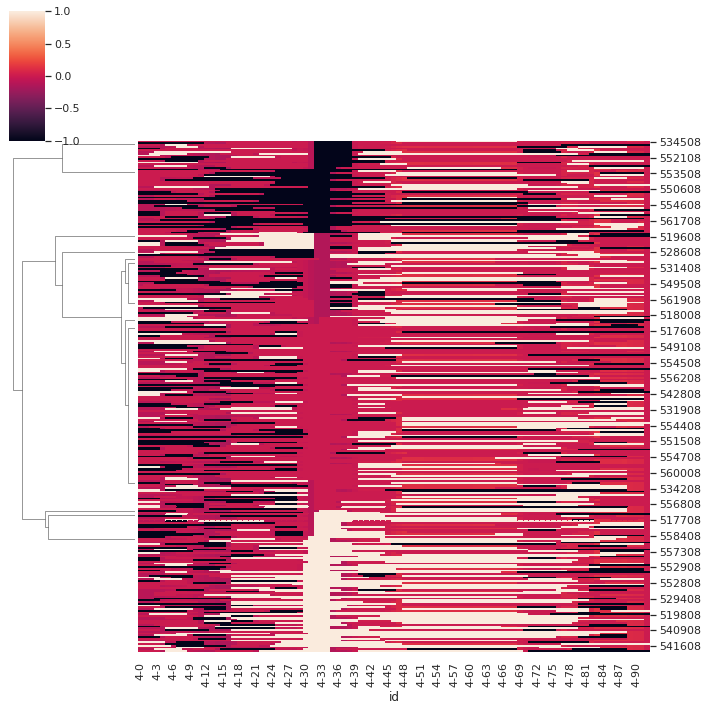

In [516]:
sns.clustermap(imputedchr4dff8, col_cluster=False, row_linkage=peak_clusterf8)

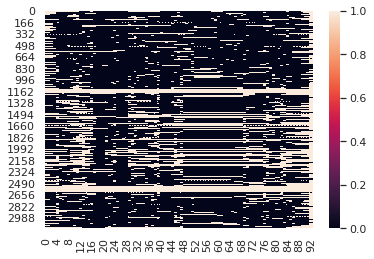

In [496]:
mask = (imputedchr4df ==-1.0) & (imputedchr4df ==1.0) & (imputedchr4df ==0.0)
sns.heatmap(mask)

In [495]:
mask = np.isin(imputedchr4df, [1.0, -1.0, 0.0], invert=True)

In [420]:
chr4_gt.dropna(how='all')

id,4-0,4-1,4-2,4-3,4-4,4-5,4-6,4-7,4-8,4-9,...,4-83,4-84,4-85,4-86,4-87,4-88,4-89,4-90,4-91,4-92
,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
44902,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
51202,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN
120502,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
48402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
41402,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
325803,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


/home/tilman/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

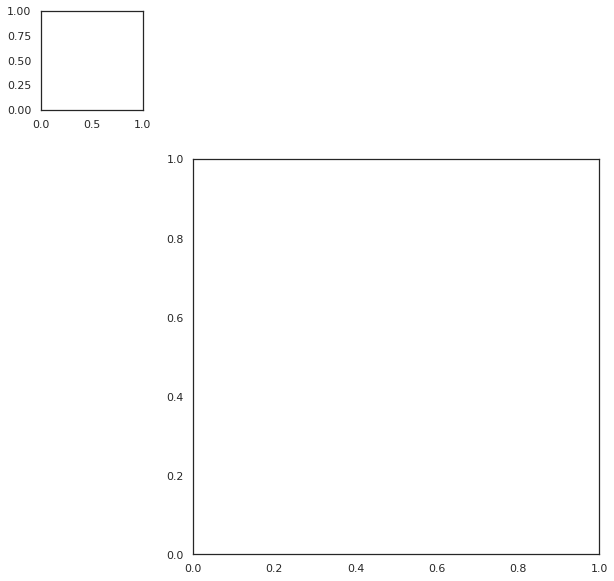

In [421]:
sns.clustermap(chr4_gt.dropna(how='all'), vmin=-1, vmax=1)

In [24]:
F2mean = list(F2s.mean(axis=0))

In [25]:
F8mean = list(F8s.mean(axis=0))

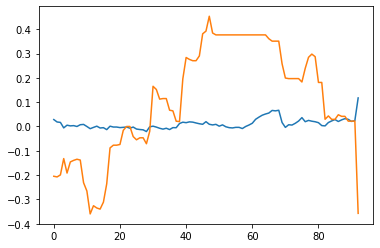

In [26]:
plt.plot(F2mean)
plt.plot(F8mean)

In [27]:
results_F2 = pd.read_csv('../results/20200731_out_all_nodensfilter_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_F2.csv', index_col=0)
results_midlate = pd.read_csv('../results/20200731_out_all_nodensfilter_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_F6F7F8F9F10F11F13F14F15.csv', index_col=0)

In [28]:
results_early = pd.read_csv('../results/20200731_out_all_nodensfilter_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_F2F3F4F5.csv', index_col=0)

In [29]:
chr4_early = results_early.loc[[i for i in results_early.index if i.startswith('4-')]]
chr4_F2 = results_F2.loc[[i for i in results_F2.index if i.startswith('4-')]]
chr4_midlate = results_midlate.loc[[i for i in results_midlate.index if i.startswith('4-')]]

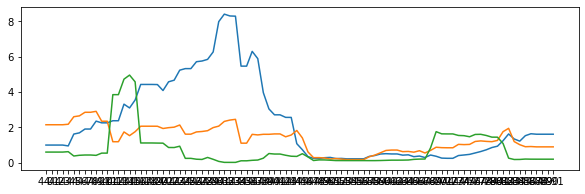

In [163]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,3))
ax.plot(chr4_early.lod)
ax.plot(chr4_F2.lod)
plt.plot(chr4_midlate.lod)                       
plt.show()               


In [138]:
chr4_early.loc[chr4_early.lod == np.max(chr4_early.lod)]

,chr,pos,lod
4-32,4,102.471284,8.417033


In [147]:
chr4_midlate.loc[chr4_midlate.lod == np.max(chr4_midlate.lod)]

,chr,pos,lod
4-15,4,49.51861,4.959491


## look for local maxima

In [168]:
from scipy.signal import argrelextrema

early_maxima = chr4_early.iloc[argrelextrema(np.array(chr4_early.lod), np.greater)]
F2_maxima = chr4_F2.iloc[argrelextrema(np.array(chr4_F2.lod), np.greater)]
midlate_maxima = chr4_midlate.iloc[argrelextrema(np.array(chr4_midlate.lod), np.greater)]


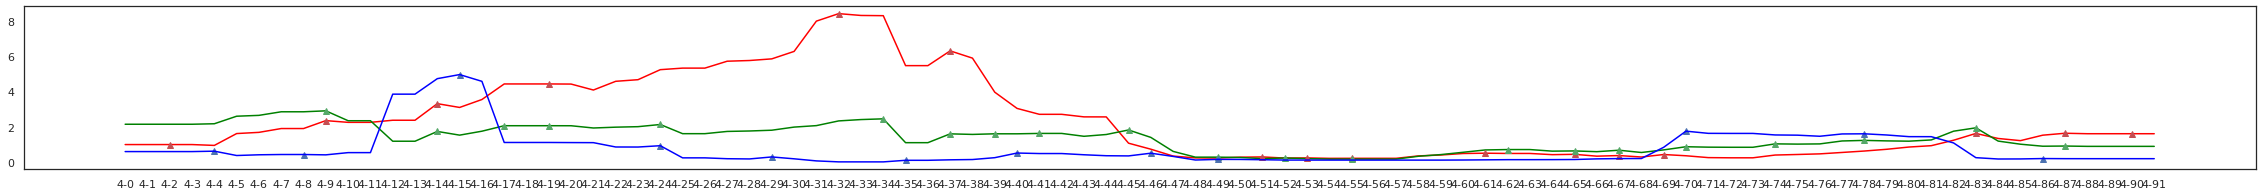

In [507]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(40,3))
ax.plot(chr4_early.lod, color='red')
ax.plot(chr4_F2.lod, color='green')
ax.plot(early_maxima.lod, 'r^')
ax.plot(F2_maxima.lod, 'g^')
ax.plot(midlate_maxima.lod, 'b^')
ax.plot(chr4_midlate.lod, color='Blue')

plt.show()


In [176]:
all_pos = list(early_maxima.index)+list(F2_maxima.index)+list(midlate_maxima.index)

In [187]:
Counter(all_pos).most_common(13)

[('4-9', 2),
 ('4-14', 2),
 ('4-19', 2),
 ('4-37', 2),
 ('4-55', 2),
 ('4-65', 2),
 ('4-67', 2),
 ('4-83', 2),
 ('4-87', 2),
 ('4-24', 2),
 ('4-49', 2),
 ('4-70', 2),
 ('4-78', 2)]

# identify late peaks
 based on looking at the plots & local maxima, i'm picking **4-14** and **4-75** for now.


In [196]:
late_peaks = chr4_gt[['4-14', '4-75']].dropna()

In [199]:
pheno = pd.read_csv('../data/20200727_intersection_phenotypes.csv')

In [236]:
pheno_subs = pheno[["id", 'BW8_norm_by_gen','BW8', 'GENERATION']]

In [237]:
gt_comb_raw = late_peaks.merge(pheno_subs, how='inner', left_index=True, right_on='id')

/home/tilman/miniconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [238]:
gt_class = []
for i, k in gt_comb_raw.iterrows():
    #print(k.index)
    a = k[('4-14', '4')]
    b = k[('4-75', '4')]
    
    if a == 1.0:
        if b == 1.0:
            gt_class.append('AABB')
        elif b == 0.0:
            gt_class.append('AABb')
        elif b == -1.0:
            gt_class.append('AAbb')
        else:
            gt_class.append('NA')

    elif a == 0.0:
        if b == 1.0:
            gt_class.append('AaBB')
        elif b == 0.0:
            gt_class.append('AaBb')
        elif b == -1.0:
            gt_class.append('Aabb')
        else:
            gt_class.append('NA')        
    
    elif a == -1.0:
        if b == 1.0:
            gt_class.append('aaBB')
        elif b == 0.0:
            gt_class.append('aaBb')
        elif b == -1.0:
            gt_class.append('aabb')
        else:
            gt_class.append('NA')       

In [305]:
group_gen = []
for i, k in gt_comb_raw.iterrows():
    if k.GENERATION<6:
        group_gen.append('early')
    elif k.GENERATION>9:
        group_gen.append('late')
    else:
        group_gen.append('mid')

In [306]:
gt_comb_raw['class'] = gt_class
gt_comb_raw['groupgen'] = group_gen

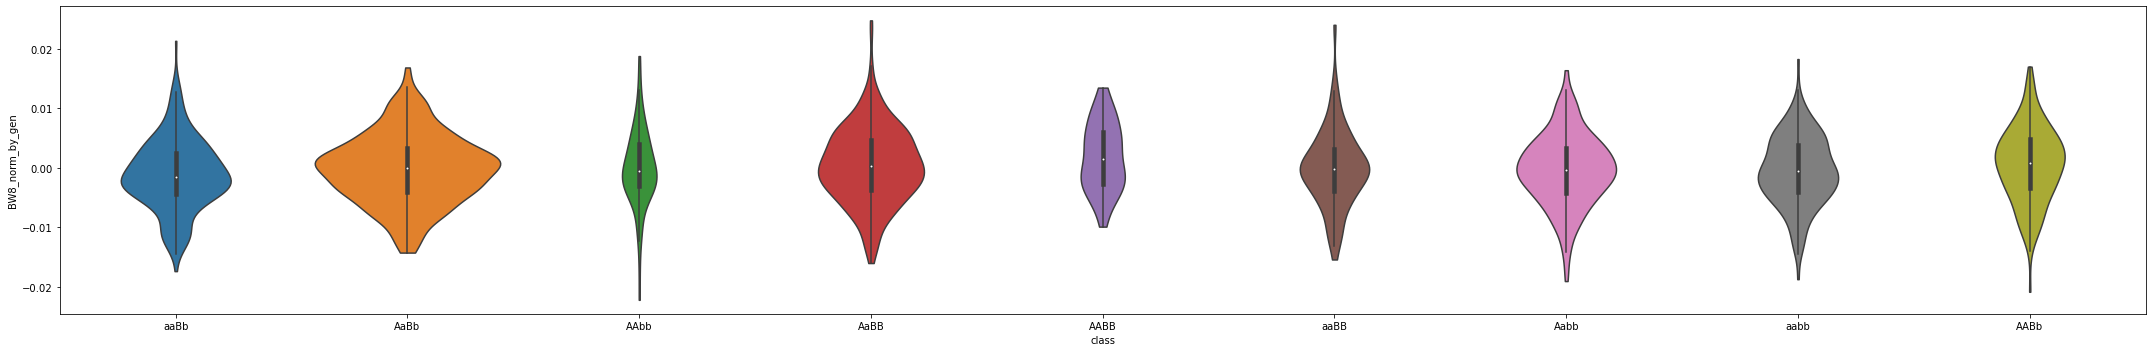

In [303]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,5))
sns.violinplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', scale="count", cut=0, ax=ax)
plt.tight_layout()
plt.show()

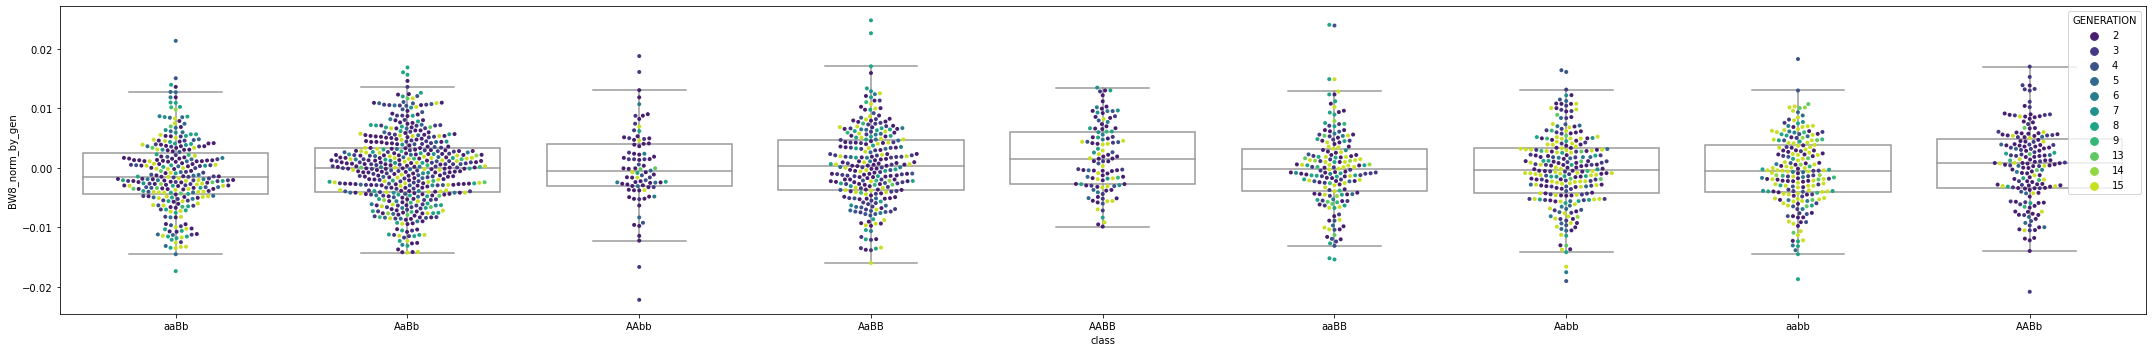

In [297]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,5))



sns.boxplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', ax=ax, fliersize=0, color='White')
sns.swarmplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', hue='GENERATION', ax=ax, alpha=1, palette="viridis", size=4)

#sns.violinplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', scale="count", cut=0, ax=ax)
plt.tight_layout()
plt.show()

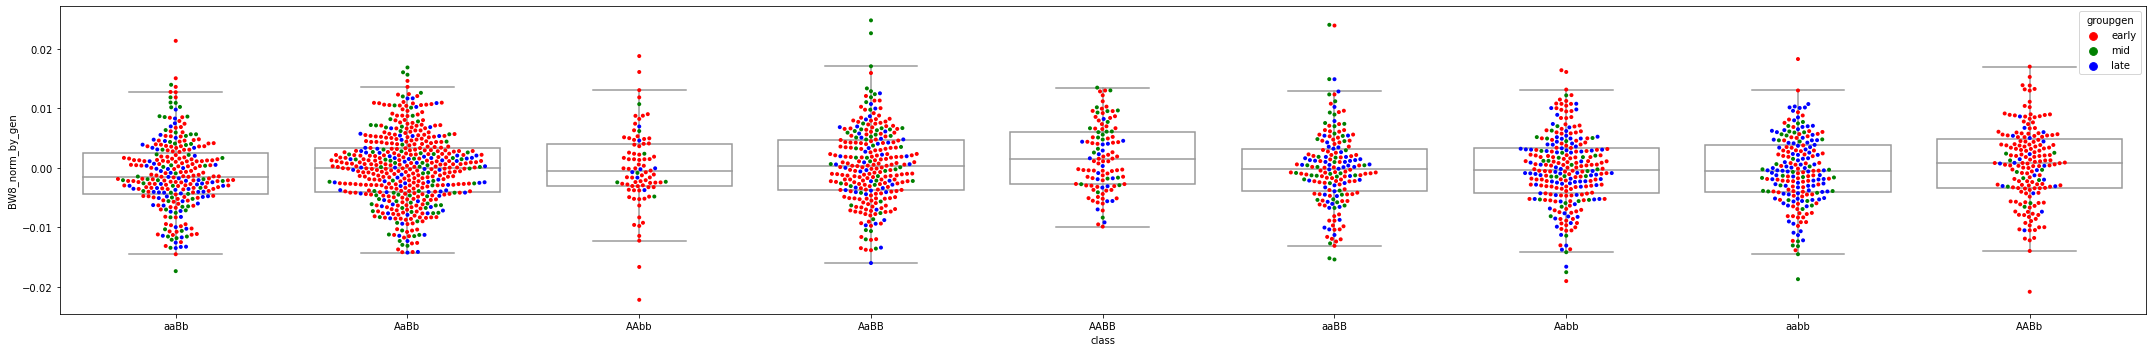

In [309]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,5))



sns.boxplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', ax=ax, fliersize=0, color='White')
sns.swarmplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', hue='groupgen', ax=ax, alpha=1, palette=["red", 'green', 'blue'], size=4)

#sns.violinplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', scale="count", cut=0, ax=ax)
plt.tight_layout()
plt.show()

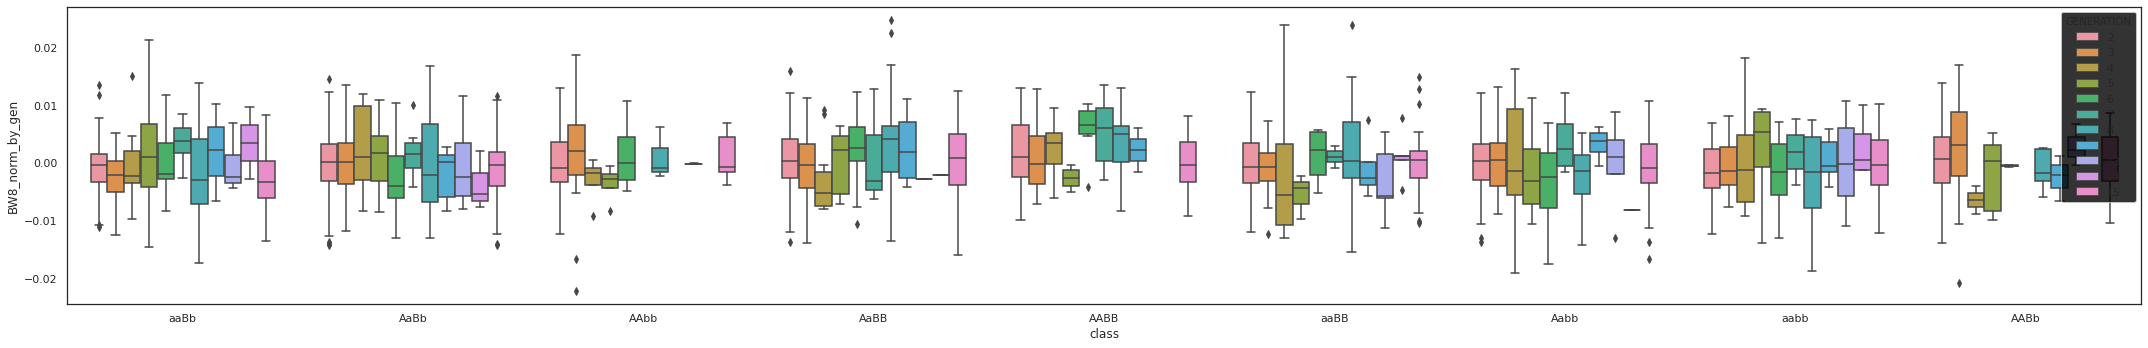

In [415]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,5))
#sns.violinplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', scale="count", cut=0, hue='GENERATION', ax=ax, palette='viridis')
sns.boxplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', hue='GENERATION', ax=ax)
plt.tight_layout()
plt.show()

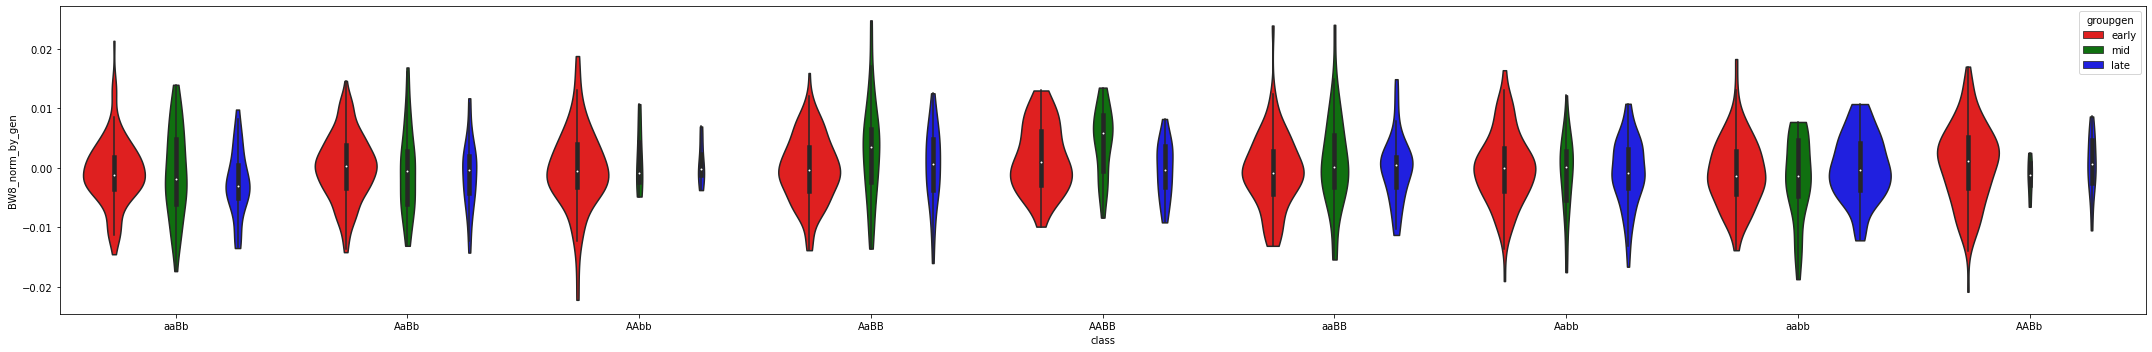

In [310]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,5))
sns.violinplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', scale="count", cut=0, hue='groupgen', ax=ax, palette=["red", 'green', 'blue'])
#sns.boxplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', hue='GENERATION', ax=ax)
plt.tight_layout()
plt.show()

In [312]:
gt_comb_raw_f3 = gt_comb_raw.loc[gt_comb_raw.GENERATION == 3]

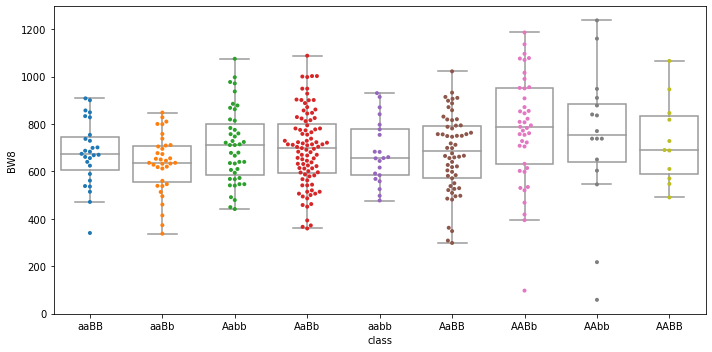

In [314]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))



sns.boxplot(data=gt_comb_raw_f3, y='BW8', x='class', ax=ax, fliersize=0, color='White')
sns.swarmplot(data=gt_comb_raw_f3, y='BW8', x='class', ax=ax, alpha=1, size=4)

#sns.violinplot(data=gt_comb_raw, y='BW8_norm_by_gen', x='class', scale="count", cut=0, ax=ax)
plt.tight_layout()
plt.show()

In [315]:
from collections import Counter

In [316]:
gencounts = gt_comb_raw.groupby('GENERATION')

In [319]:
cdicts = {}
for i, k in gencounts:
    print(i)
    cdicts[i]=Counter(k['class'])

2
3
4
5
6
7
8
9
13
14
15


In [323]:
per_gen_counts = pd.DataFrame(cdicts).replace(np.nan, 0.0)

In [328]:
pgc_sums = per_gen_counts.sum(axis=0)

In [329]:
per_gen_counts_frac_per_gen = per_gen_counts/pgc_sums

In [337]:
per_gen_counts_frac_per_gen = per_gen_counts_frac_per_gen.T

In [341]:
per_gen_counts_frac_per_gen = per_gen_counts_frac_per_gen[['aabb', 'aaBb','aaBB','Aabb','AaBb','AaBB', 'AAbb', 'AABb','AABB']] # sort them 

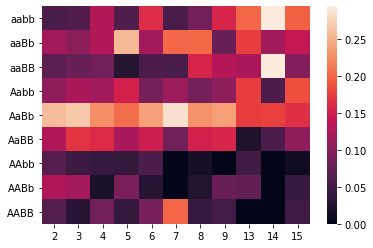

In [343]:
sns.heatmap(per_gen_counts_frac_per_gen.T)

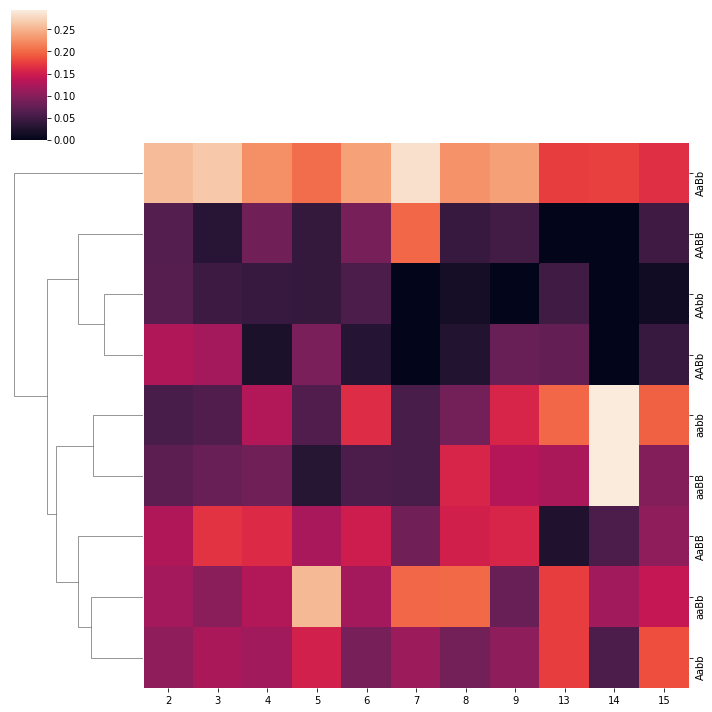

In [346]:
sns.clustermap(per_gen_counts_frac_per_gen.T, col_cluster=False)

In [ ]:
Index([  'AAbb',  'AABB',   'AABb'], dtype='object')

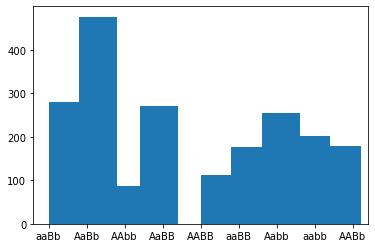

In [290]:
plt.hist(gt_comb_raw['class'], align='mid', width=1)
plt.show()

In [34]:
F2s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('02')]]
F3s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('03')]]
F4s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('04')]]
F5s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('05')]]
F6s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('06')]]
F7s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('07')]]
F8s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('08')]]
F9s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('09')]]
F10s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('10')]]
F11s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('11')]]
F13s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('13')]]
F14s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('14')]]
F15s = chr4_gt.loc[[i for i in chr4_gt.index if i.endswith('15')]]


In [31]:
Fearlys = chr4_gt.loc[[i for i in chr4_gt.index if any([i.endswith('02'),i.endswith('03'),i.endswith('04'),i.endswith('05')])]]
Fmidlate = chr4_gt.loc[[i for i in chr4_gt.index if not any([i.endswith('02'),i.endswith('03'),i.endswith('04'),i.endswith('05')])]]

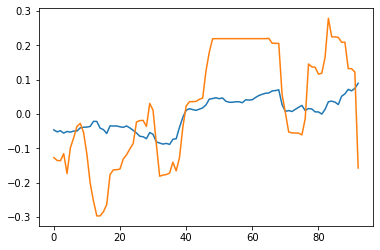

In [32]:
plt.plot(list(Fearlys.mean(axis=0)))
plt.plot(list(Fmidlate.mean(axis=0)))

In [35]:
F2mean = list(F2s.mean(axis=0))
F3mean = list(F3s.mean(axis=0))
F4mean = list(F4s.mean(axis=0))
F5mean = list(F5s.mean(axis=0))
F6mean = list(F6s.mean(axis=0))
F7mean = list(F7s.mean(axis=0))
F8mean = list(F8s.mean(axis=0))
F9mean = list(F9s.mean(axis=0))
F10mean = list(F10s.mean(axis=0))
F11mean = list(F11s.mean(axis=0))
F13mean = list(F13s.mean(axis=0))

F14mean = list(F14s.mean(axis=0))
F15mean = list(F15s.mean(axis=0))


In [36]:
all_means = [F2mean, F3mean, F4mean, F5mean, F6mean, F7mean, F8mean, F9mean, F10mean, F11mean, F13mean, F14mean, F15mean]

In [354]:
strings = """F2mean, F3mean, F4mean, F5mean, F6mean, F7mean, F8mean, F9mean, F10mean, F11mean, F13mean, F14mean, F15mean""".split(",")

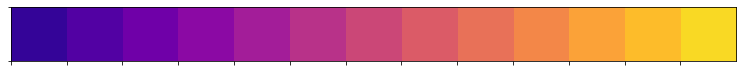

In [37]:
sns.palplot(sns.palettes.color_palette('plasma',13 ))

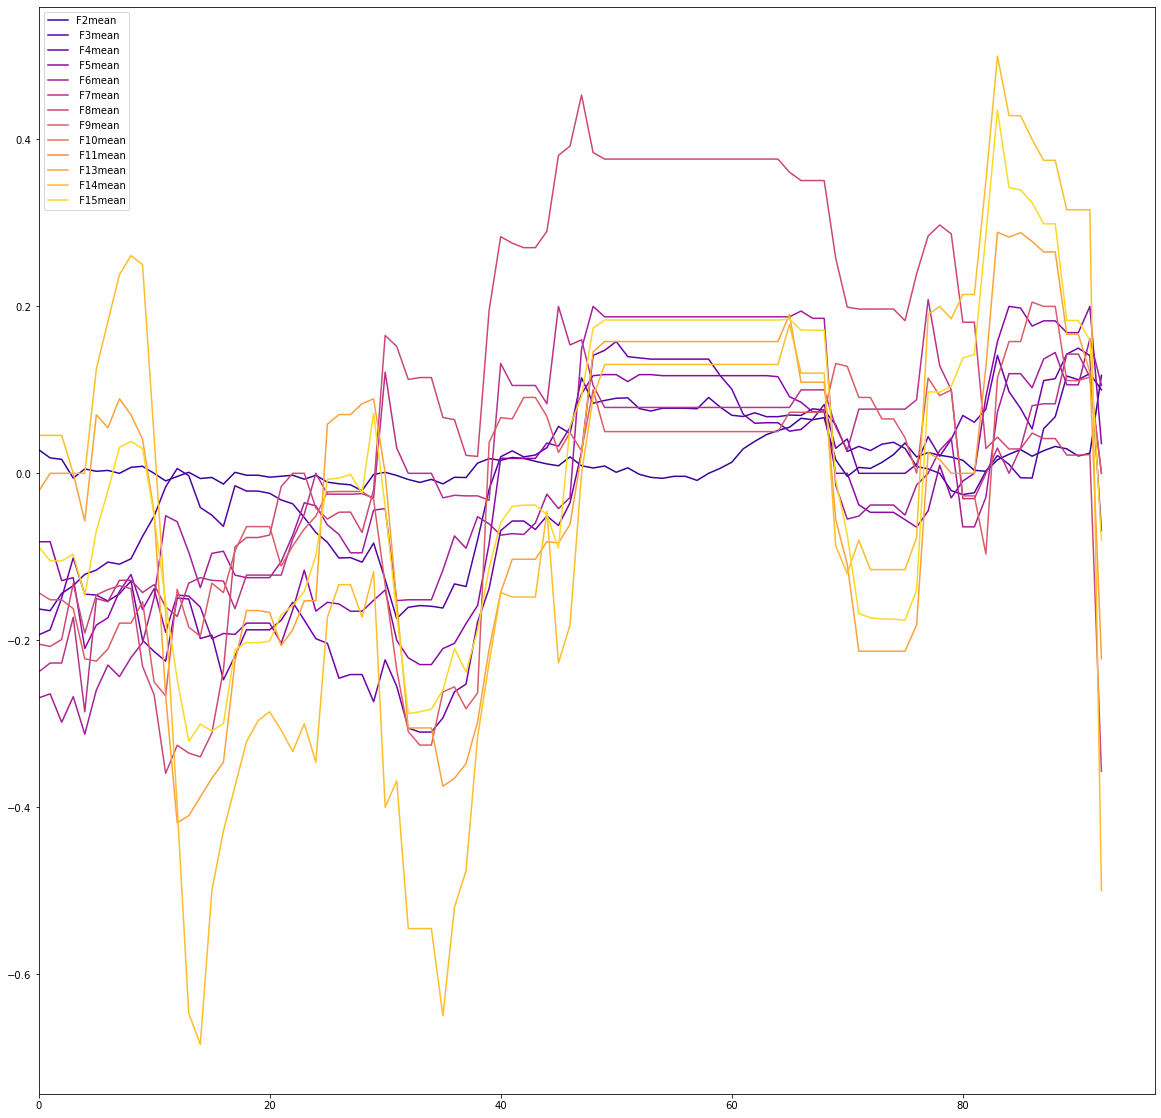

In [42]:
cmap = sns.palettes.color_palette('plasma',13)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
for i, k in enumerate(all_means):
    ax.plot(k, color=cmap[i], label=strings[i])
    
ax.set_xlim(0,)

plt.legend()
plt.show()


/home/tilman/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/home/tilman/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


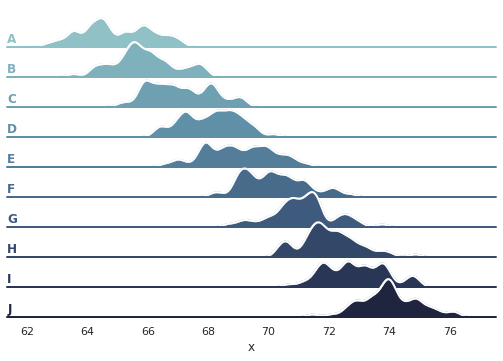

In [348]:

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m


In [384]:
mean_df = pd.DataFrame(all_means).T
mean_df.columns = strings

In [385]:
#mean_df = mean_df.reset_index()

In [377]:
melt_mean = mean_df.melt(id_vars=['index'])

In [378]:
melt_mean

,index,variable,value
0,0,F2mean,0.028409
1,1,F2mean,0.018484
2,2,F2mean,0.016750
3,3,F2mean,-0.005764
4,4,F2mean,0.005305
...,...,...,...
1204,88,F15mean,0.298969
1205,89,F15mean,0.183140
1206,90,F15mean,0.183140
1207,91,F15mean,0.159509


ValueError: Could not interpret input 'index'

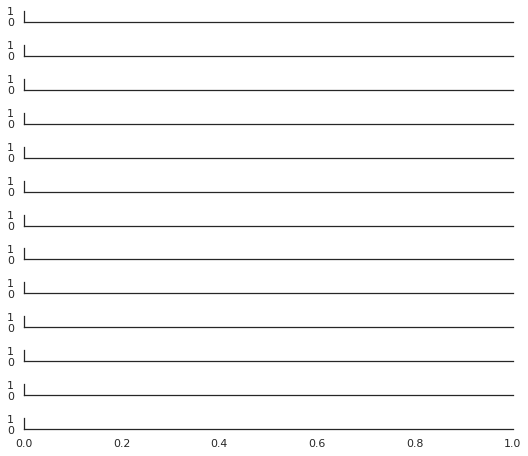

In [379]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(13, rot=-.25, light=.7)
g = sns.FacetGrid(melt_mean, row="variable", hue="value", aspect=15, height=.5, palette=pal)
# Draw the densities in a few steps
g.map(sns.lineplot,x='index', y="value", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.lineplot,x='index', y="value", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

    
    
g.map(label, "value")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

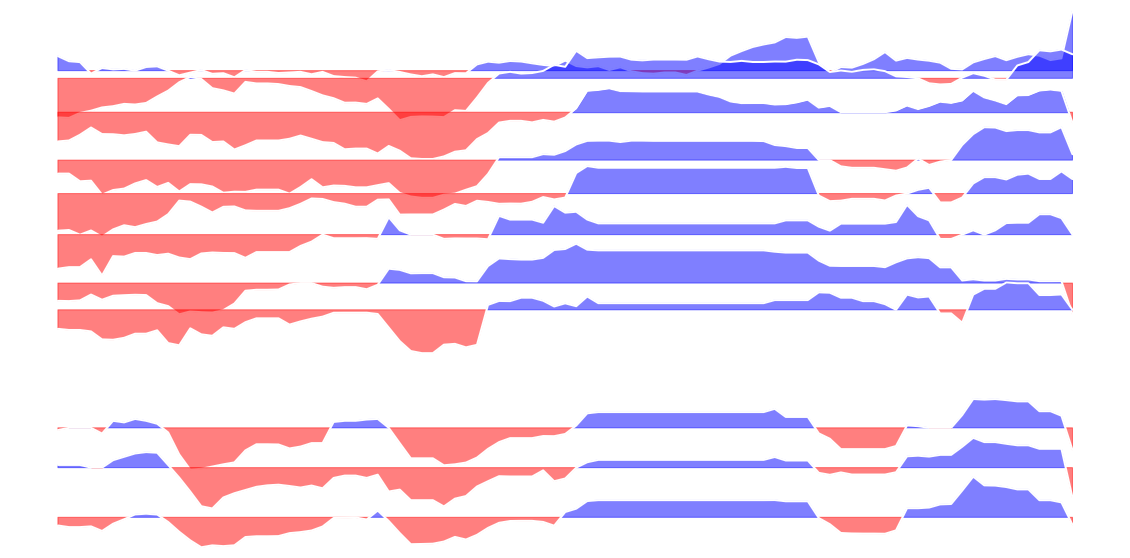

In [412]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

fig, axes = plt.subplots(ncols=1, nrows=13, figsize=(20,10))
for j, (i,k) in enumerate(mean_df.T.iterrows()):
    axes[j].plot(k, color='w', lw=2)
    d = np.zeros(len(k))
    axes[j].fill_between(range(len(k)),k,where=k>=d, color='blue',interpolate=True, alpha=0.5)
    axes[j].fill_between(range(len(k)),k,where=k<=d, color='Red', interpolate=True, alpha = 0.5)
    #axes[j].set_titles("")
#    axes[j].set(yticks=[])
    axes[j].axis('off')

    
    
fig.subplots_adjust(hspace=-.50)

# Remove axes details that don't play well with overlap
# Define and use a simple function to label the plot in axes coordinates


plt.show()

In [ ]:

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)